In [1]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime #Important for working with time series data

/Users/sushantkotwal96/tensorflow_vs_code/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
import yfinance as yf

In [10]:
tsla_data = yf.download('TSLA')

[*********************100%***********************]  1 of 1 completed


In [11]:
tsla_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [12]:
tsla_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3602 entries, 2010-06-29 to 2024-10-18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3602 non-null   float64
 1   High       3602 non-null   float64
 2   Low        3602 non-null   float64
 3   Close      3602 non-null   float64
 4   Adj Close  3602 non-null   float64
 5   Volume     3602 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 197.0 KB


## Simple Moving Average

In [18]:
## Simple Moving Average for 'Open' with a window size of 10
## Minimum number of observations in window required to have a value; otherwise, result is ``np.nan`
tsla_data['Open:10 days rolling']=tsla_data['Open'].rolling(10,min_periods=1).mean()

In [19]:
tsla_data

,Open,High,Low,Close,Adj Close,Volume,Open:10 days rolling
Date,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,1.266667
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,1.493000
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,1.550889
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,1.546500
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,1.503867
...,...,...,...,...,...,...,...
2024-10-14,220.130005,221.910004,213.740005,219.160004,219.160004,86291900,241.984003
2024-10-15,220.009995,224.259995,217.119995,219.570007,219.570007,62988800,237.718001
2024-10-16,221.399994,222.820007,218.929993,221.330002,221.330002,49632800,235.103000


<Axes: xlabel='Date'>

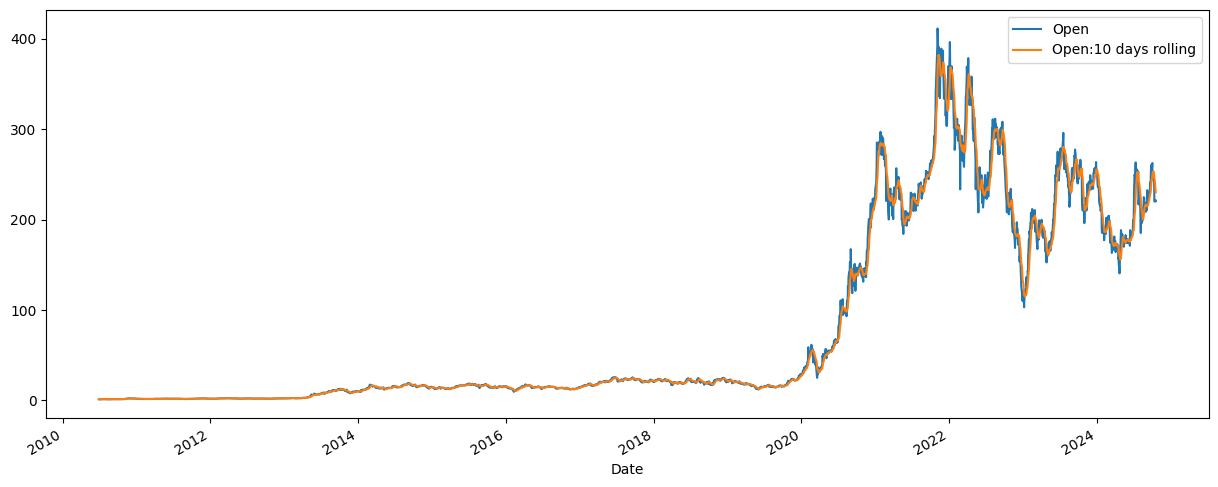

In [20]:
tsla_data[['Open','Open:10 days rolling']].plot(figsize=(15,6))

<Axes: xlabel='Date'>

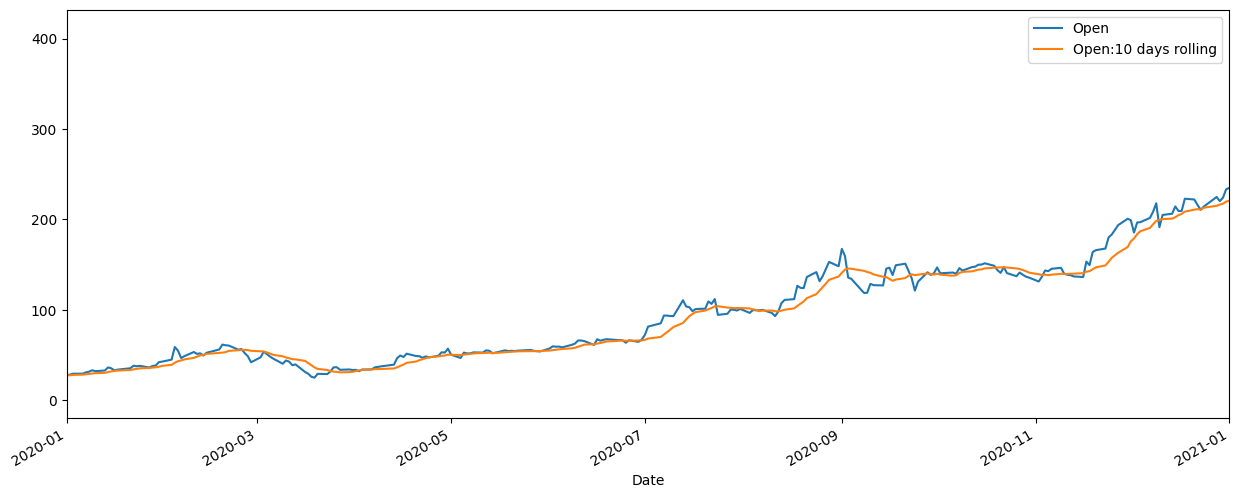

In [22]:
tsla_data[['Open','Open:10 days rolling']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

In [23]:
tsla_data['Open:30 days rolling']=tsla_data['Open'].rolling(30,min_periods=1).mean()
tsla_data['Open:50 days rolling']=tsla_data['Open'].rolling(50,min_periods=1).mean()

<Axes: xlabel='Date'>

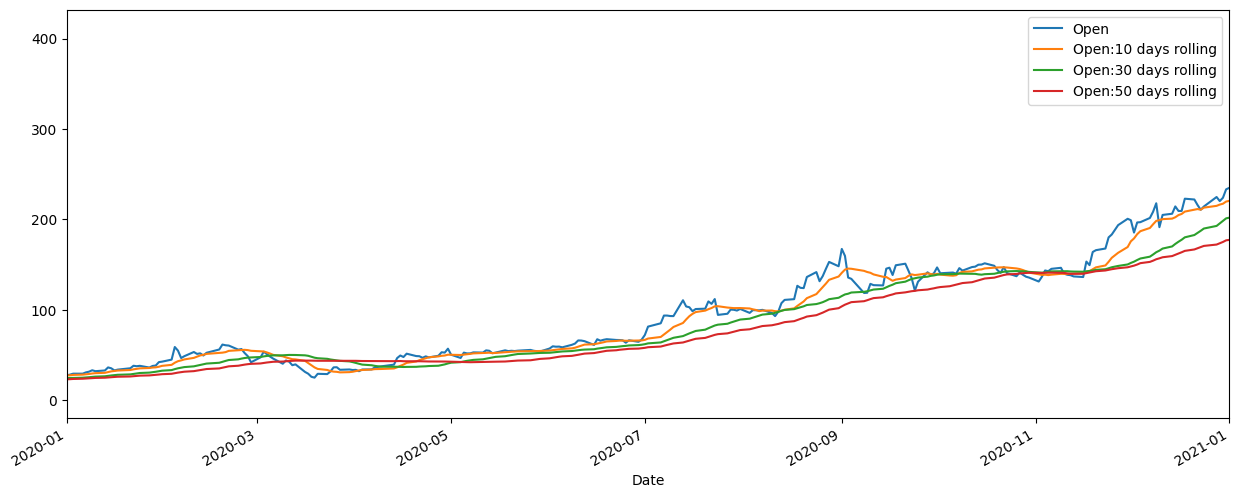

In [24]:
tsla_data[['Open','Open:10 days rolling','Open:30 days rolling','Open:50 days rolling']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

## Disadvantage of Simple Moving Average:
* Giving similar importance to all the data. Because in Time Series Data, main focus is giving more importance/weight to the recent data

## Cumulative Moving Average

In [28]:
## The cumulative moving average is calculated using the expanding() function
tsla_data[['Open']].expanding().mean()

,Open
Date,
2010-06-29,1.266667
2010-06-30,1.493000
2010-07-01,1.550889
2010-07-02,1.546500
2010-07-06,1.503867
...,...
2024-10-14,77.711920
2024-10-15,77.751458
2024-10-16,77.791360


<Axes: xlabel='Date'>

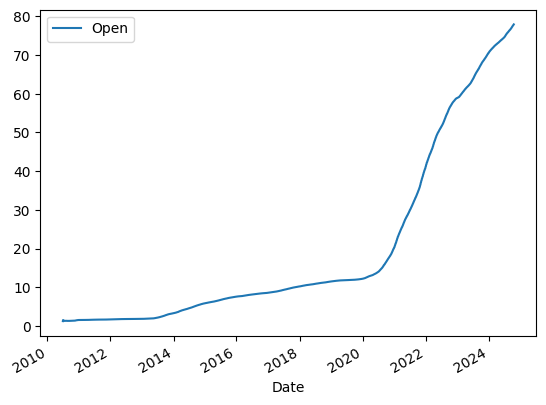

In [27]:
tsla_data[['Open']].expanding().mean().plot()

## Exponential Weighted Moving Average

In [29]:
tsla_data['Open_EMA_0.1'] = tsla_data['Open'].ewm(alpha=0.1,adjust=False).mean()

<Axes: xlabel='Date'>

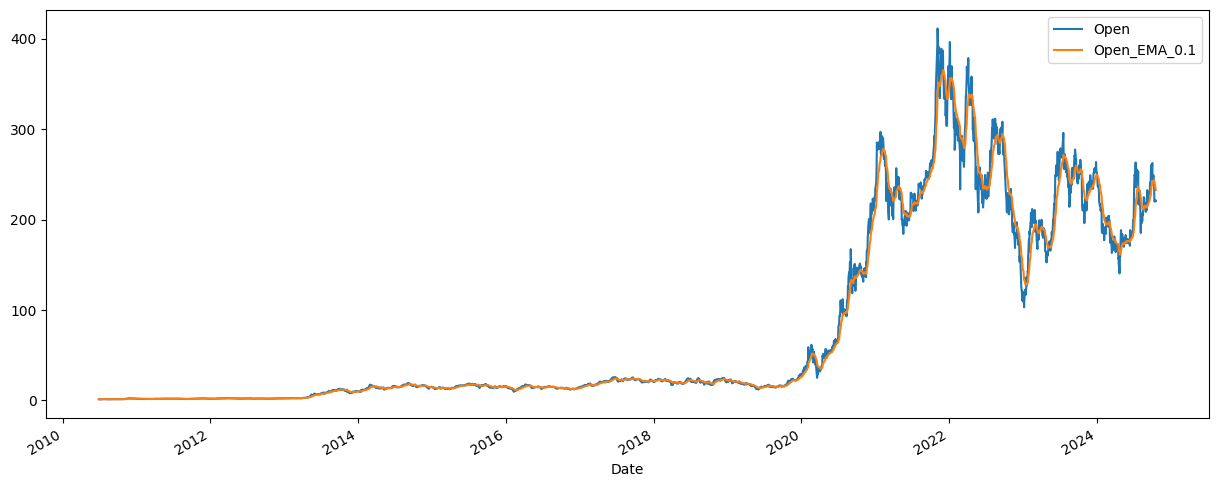

In [31]:
tsla_data[['Open','Open_EMA_0.1']].plot(figsize=(15,6))

### You can try to adjust the alpha to test with different smoothening factors

In [32]:
tsla_data['Open_EMA_0.3'] = tsla_data['Open'].ewm(alpha=0.3,adjust=False).mean()

<Axes: xlabel='Date'>

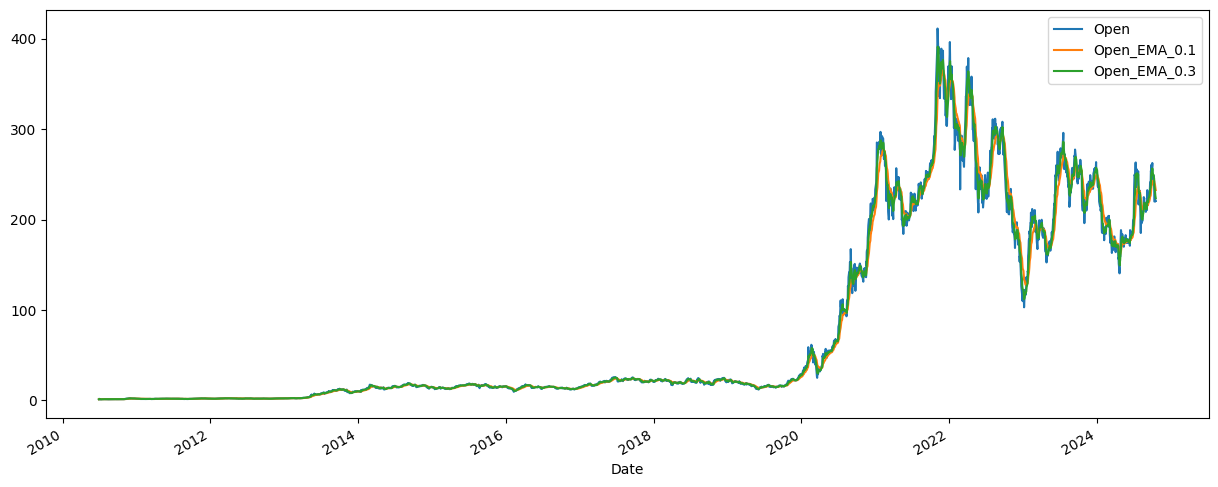

In [33]:
tsla_data[['Open','Open_EMA_0.1','Open_EMA_0.3']].plot(figsize=(15,6))

<Axes: xlabel='Date'>

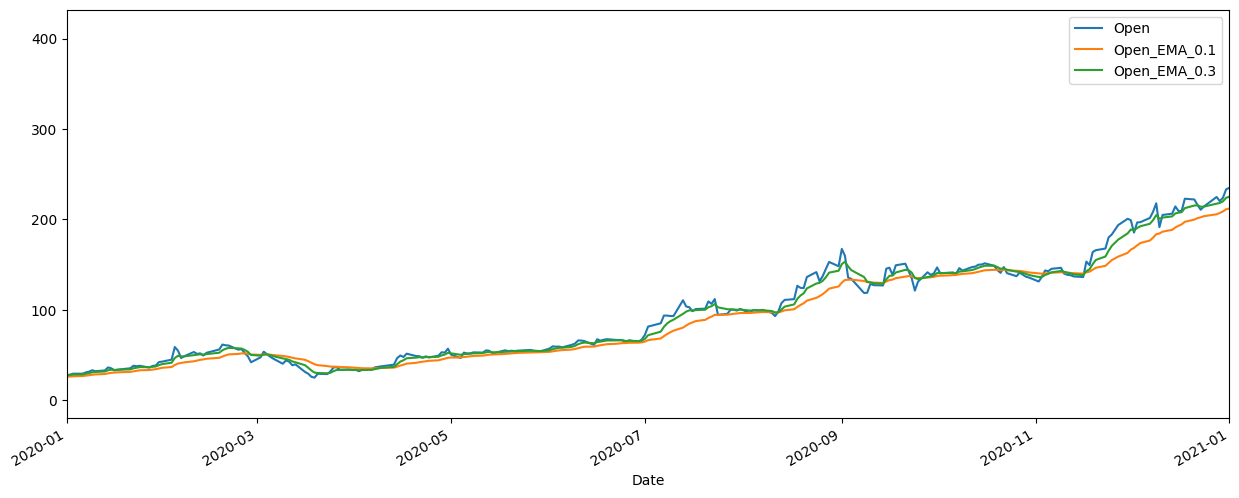

In [35]:
tsla_data[['Open','Open_EMA_0.1','Open_EMA_0.3']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

In [36]:
tsla_data['Open_EMA_5days'] = tsla_data['Open'].ewm(span=5,adjust=False).mean()

<Axes: xlabel='Date'>

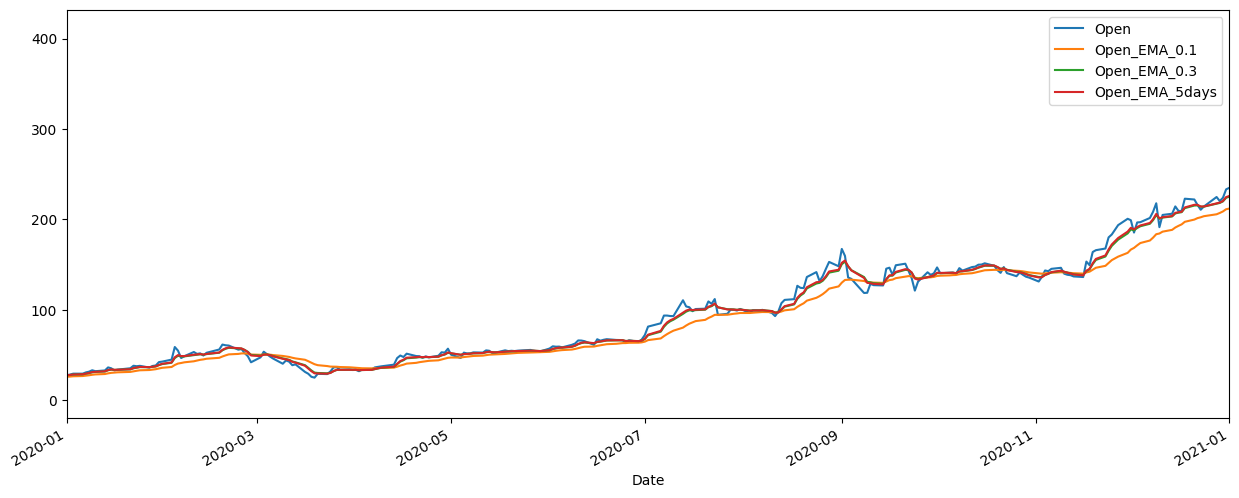

In [37]:
tsla_data[['Open','Open_EMA_0.1','Open_EMA_0.3','Open_EMA_5days']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))